In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import Imputer
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 2

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                sep='\s+', header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
'model', 'origin', 'car_name'])
df = df.replace('?', np.nan)
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
count,398.000000,398.000000,398.000000,392,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,93,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [3]:
strategies = ['mean', 'median', 'most_frequent']
for s in strategies:
    df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                sep='\s+', header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
'model', 'origin', 'car_name'])
    df = df.replace('?', np.nan)
    imp = Imputer(missing_values='NaN', strategy=s)
    df['horsepower'] = imp.fit_transform(df[['horsepower']])
    print('variance with %s imputation = %f'
          % (s, df['horsepower'].var()))

variance with mean imputation = 1459.177916
variance with median imputation = 1460.969052
variance with most_frequent imputation = 1490.036125


# Problem 3

In [4]:
dataset = datasets.load_iris()
dataset_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [5]:
pca = decomposition.PCA(n_components=4)
pca.fit(dataset_df.iloc[:,:])
for i in range(4):
    print("%% of variance explained by PC%d = %f"
         % (i+1, pca.explained_variance_ratio_[i]))

% of variance explained by PC1 = 0.924616
% of variance explained by PC2 = 0.053016
% of variance explained by PC3 = 0.017185
% of variance explained by PC4 = 0.005183


In [6]:
ori_vars = []
for c in dataset_df.columns:
    ori_vars.append(dataset_df[c].var())
tot_var = sum(ori_vars)
for c in dataset_df.columns:
    print("%% of variance explained by %-17s = %f"
          % (c, dataset_df[c].var()/tot_var))

% of variance explained by sepal length (cm) = 0.150066
% of variance explained by sepal width (cm)  = 0.041145
% of variance explained by petal length (cm) = 0.681327
% of variance explained by petal width (cm)  = 0.127463


# Problem 4

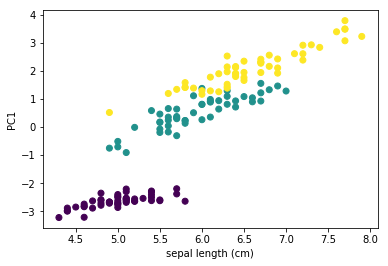

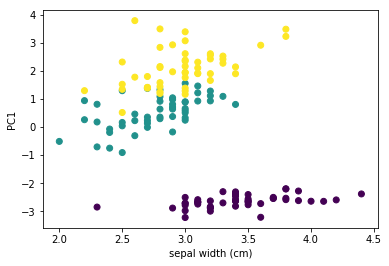

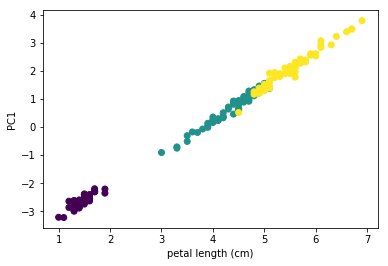

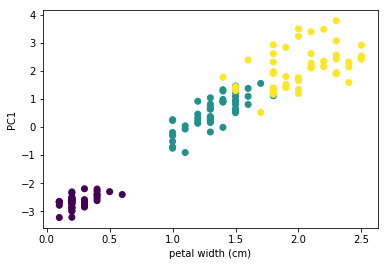

In [7]:
pca = decomposition.PCA(n_components=1)
pca.fit(dataset_df.iloc[:,:])
X = pca.transform(dataset_df.iloc[:,:])
for i in range(4):
    plt.scatter(dataset_df.iloc[:,i], X[:,0], c=dataset.target)
    plt.xlabel(dataset_df.columns[i])
    plt.ylabel('PC1')
    plt.show()

In [8]:
for i in range(4):
    print('PCC between %-17s and PC1: %f'
          % (dataset_df.columns[i], 
             np.corrcoef(X[:,0], dataset_df.iloc[:,i])[0][1]))

PCC between sepal length (cm) and PC1: 0.897545
PCC between sepal width (cm)  and PC1: -0.389993
PCC between petal length (cm) and PC1: 0.997854
PCC between petal width (cm)  and PC1: 0.966484


# Problem 5

In [10]:
pca = decomposition.PCA(n_components=4)
dataset_pca = pd.DataFrame(pca.fit_transform(dataset_df.iloc[:,:]), 
                           columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_tot_var = 0
for i in range(4):
    print("variance of %-17s = %f | variance of %s = %f"
         % (dataset_df.columns[i], dataset_df[dataset_df.columns[i]].var(), 
         dataset_pca.columns[i], dataset_pca[dataset_pca.columns[i]].var()))
    pca_tot_var += dataset_pca[dataset_pca.columns[i]].var()
print("total variance of original features = %f | of four eigenvectors = %f"
     % (tot_var, pca_tot_var))

variance of sepal length (cm) = 0.685694 | variance of PC1 = 4.224841
variance of sepal width (cm)  = 0.188004 | variance of PC2 = 0.242244
variance of petal length (cm) = 3.113179 | variance of PC3 = 0.078524
variance of petal width (cm)  = 0.582414 | variance of PC4 = 0.023683
total variance of original features = 4.569291 | of four eigenvectors = 4.569291
